Random Forest
Feature Extraction Method: GLCM
Features Taken with distance = 1,3,5, angle = 0,45,90,135,180,225,270,315) (total 120 features)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"MyDrive/Machine Learning/GLCM_Features"

/content/drive/MyDrive/Machine Learning/GLCM_Features


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import glob
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
import time

In [ ]:
X_train = list()
X_test = list()
y_train = list()
y_test = list()

# for k fold cross validation
x_new = list()
y_new = list()

In [ ]:
# 0 = crazing 
# 1 = inclusion
# 2 = patches
# 3 = pitted_surface
# 4 = rolled in scale
# 5 = scratches

In [ ]:
dataset1 = pd.read_csv('GLCM_train.csv')
print(dataset1)

      Unnamed: 0   Energy0     Corr0  Diss_sim0  Homogen0   Contrast0  \
0              0  0.014224  0.725731  15.456080  0.063373  383.715930   
1              0  0.015558  0.778272  12.804573  0.076365  263.964171   
2              0  0.015120  0.746263  13.894296  0.069790  310.096910   
3              0  0.016114  0.719193  13.510452  0.071717  292.011709   
4              0  0.013543  0.787991  14.764347  0.066498  351.571382   
...          ...       ...       ...        ...       ...         ...   
1435           0  0.033905  0.971425   3.316633  0.292426   22.962261   
1436           0  0.058558  0.959366   2.681734  0.485881   48.285804   
1437           0  0.047101  0.983943   2.665603  0.434930   30.869422   
1438           0  0.052825  0.987204   3.837789  0.358781   61.731910   
1439           0  0.052105  0.966701   3.046206  0.392387   38.874296   

       Energy1     Corr1  Diss_sim1  Homogen1  ...  Energy22    Corr22  \
0     0.013450  0.616408  18.258428  0.054306  ..

In [ ]:
x = dataset1.iloc[:,1:].values
print(len(x[0]))

120


In [ ]:
print(x)

[[1.42235469e-02 7.25731266e-01 1.54560804e+01 ... 2.50577884e+01
  4.05208138e-02 1.01923751e+03]
 [1.55583846e-02 7.78271956e-01 1.28045729e+01 ... 1.96631352e+01
  5.13562318e-02 6.26654545e+02]
 [1.51195333e-02 7.46262736e-01 1.38942965e+01 ... 2.22071793e+01
  4.62140829e-02 7.96455565e+02]
 ...
 [4.71007360e-02 9.83943252e-01 2.66560302e+00 ... 7.39074865e+00
  2.49918243e-01 2.54045684e+02]
 [5.28245045e-02 9.87203605e-01 3.83778894e+00 ... 1.07429456e+01
  1.96037798e-01 5.11558647e+02]
 [5.21048101e-02 9.66701159e-01 3.04620603e+00 ... 6.07725948e+00
  2.54339847e-01 1.77470117e+02]]


In [ ]:
print(x[0])

[1.42235469e-02 7.25731266e-01 1.54560804e+01 6.33728906e-02
 3.83715930e+02 1.34496351e-02 6.16407720e-01 1.82584278e+01
 5.43057083e-02 5.36650034e+02 1.45606429e-02 7.59055851e-01
 1.45129397e+01 6.73377845e-02 3.37119020e+02 1.36664513e-02
 6.55656905e-01 1.73407742e+01 5.77192005e-02 4.81738744e+02
 1.42235469e-02 7.25731266e-01 1.54560804e+01 6.33728906e-02
 3.83715930e+02 1.34496351e-02 6.16407720e-01 1.82584278e+01
 5.43057083e-02 5.36650034e+02 1.45606429e-02 7.59055851e-01
 1.45129397e+01 6.73377845e-02 3.37119020e+02 1.36664513e-02
 6.55656905e-01 1.73407742e+01 5.77192005e-02 4.81738744e+02
 1.26830436e-02 3.95794743e-01 2.26954061e+01 4.46945403e-02
 8.42411802e+02 1.26403998e-02 3.88674657e-01 2.28848332e+01
 4.50317227e-02 8.54238369e+02 1.26798942e-02 4.15270877e-01
 2.25397208e+01 4.35298264e-02 8.18826878e+02 1.27552290e-02
 4.36699820e-01 2.20984083e+01 4.46882495e-02 7.87138557e+02
 1.26830436e-02 3.95794743e-01 2.26954061e+01 4.46945403e-02
 8.42411802e+02 1.264039

In [ ]:
print(len(x))

1440


In [ ]:
y = list()

In [ ]:
for i in range(0,6) :
    for j in range(0,240):
        y.append(i)


In [ ]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
X_train = x
y_train = y

In [ ]:
dataset1 = pd.read_csv('GLCM_test.csv')
print(dataset1)

     Unnamed: 0   Energy0     Corr0  Diss_sim0  Homogen0   Contrast0  \
0             0  0.014085  0.748947  15.308317  0.063230  375.439874   
1             0  0.013354  0.812510  14.557965  0.068531  341.479372   
2             0  0.013476  0.759687  15.553065  0.063098  390.181206   
3             0  0.013039  0.771689  15.981709  0.062617  409.665628   
4             0  0.013783  0.757698  15.442638  0.064622  387.517764   
..          ...       ...       ...        ...       ...         ...   
355           0  0.062155  0.995837   1.575452  0.488198    5.920075   
356           0  0.067211  0.985235   1.432513  0.498722    4.875427   
357           0  0.055791  0.988033   2.337362  0.355444   10.801583   
358           0  0.046354  0.989063   2.493492  0.373817   19.243593   
359           0  0.055859  0.979090   2.404749  0.356955   14.151985   

      Energy1     Corr1  Diss_sim1  Homogen1  ...  Energy22    Corr22  \
0    0.013353  0.651627  17.977299  0.054884  ...  0.012267  0

In [ ]:
x = dataset1.iloc[:,1:].values
print(len(x[0]))

120


In [ ]:
print(x)
print(x[0])

[[1.40851053e-02 7.48946716e-01 1.53083166e+01 ... 2.52919877e+01
  4.12090470e-02 1.05380630e+03]
 [1.33542182e-02 8.12510406e-01 1.45579648e+01 ... 2.30294409e+01
  4.41729560e-02 8.60134241e+02]
 [1.34756312e-02 7.59686590e-01 1.55530653e+01 ... 2.56813307e+01
  3.83698324e-02 1.07731544e+03]
 ...
 [5.57906864e-02 9.88033099e-01 2.33736181e+00 ... 9.74463765e+00
  1.72121360e-01 4.95202312e+02]
 [4.63544075e-02 9.89062761e-01 2.49349246e+00 ... 1.14735267e+01
  1.89257210e-01 7.34857429e+02]
 [5.58592725e-02 9.79089631e-01 2.40474874e+00 ... 9.31156289e+00
  1.68402502e-01 3.99055940e+02]]
[1.40851053e-02 7.48946716e-01 1.53083166e+01 6.32298821e-02
 3.75439874e+02 1.33527101e-02 6.51626626e-01 1.79772986e+01
 5.48840623e-02 5.20755663e+02 1.44900611e-02 7.84241722e-01
 1.41835678e+01 6.95831467e-02 3.22941960e+02 1.36216790e-02
 6.93382163e-01 1.68698770e+01 5.94963105e-02 4.58334588e+02
 1.40851053e-02 7.48946716e-01 1.53083166e+01 6.32298821e-02
 3.75439874e+02 1.33527101e-02 6.5

In [ ]:
print(len(x))

360


In [ ]:
y = list()

In [ ]:
for i in range(0,6) :
    for j in range(0,60):
        y.append(i)


In [ ]:
X_test = x
y_test = y

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1440
360
1440
360


In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1440, 120) (1440,)
Test set: (360, 120) (360,)


In [ ]:
nsamples, nx = X_train.shape
X_train = X_train.reshape((nsamples,nx))

In [ ]:
print(X_train.shape)

(1440, 120)


In [ ]:
nsamples, nx = X_test.shape
X_test = X_test.reshape((nsamples,nx))

In [ ]:
print(X_test.shape)

(360, 120)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
train_accuracy = list()
test_accuracy = list()
no_of_estimators = list()

In [ ]:
for i in range(10,100,5) :
    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=i)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_train)
    #print("Train Accuracy:",metrics.accuracy_score(output_class, y_pred))
    train_accuracy.append(metrics.accuracy_score(y_train, y_pred))

    y_pred_test = clf.predict(X_test)
    #print("Test Accuracy:",metrics.accuracy_score(output_predict_class, y_pred_test))
    test_accuracy.append(metrics.accuracy_score(y_test, y_pred_test))

    no_of_estimators.append(i)

In [ ]:
print(train_accuracy)
print(test_accuracy)
print(no_of_estimators)

[0.9979166666666667, 0.9986111111111111, 0.9993055555555556, 1.0, 0.9993055555555556, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9993055555555556, 1.0, 1.0, 1.0, 1.0]
[0.9083333333333333, 0.9444444444444444, 0.9305555555555556, 0.9305555555555556, 0.9277777777777778, 0.9472222222222222, 0.9305555555555556, 0.9416666666666667, 0.9305555555555556, 0.9444444444444444, 0.9361111111111111, 0.9361111111111111, 0.9388888888888889, 0.9388888888888889, 0.9388888888888889, 0.9333333333333333, 0.9388888888888889, 0.9333333333333333]
[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


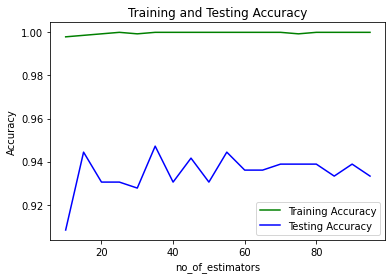

In [ ]:
plt.plot(no_of_estimators, train_accuracy, 'g', label='Training Accuracy')
plt.plot(no_of_estimators, test_accuracy, 'b', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('no_of_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
max(test_accuracy)

0.9472222222222222

In [ ]:
clf=RandomForestClassifier(n_estimators=30)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))

0.95
[[60  0  0  0  0  0]
 [ 0 49  0  8  0  3]
 [ 3  0 57  0  0  0]
 [ 0  0  2 57  0  1]
 [ 0  0  0  0 60  0]
 [ 0  1  0  0  0 59]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       0.98      0.82      0.89        60
           2       0.97      0.95      0.96        60
           3       0.88      0.95      0.91        60
           4       1.00      1.00      1.00        60
           5       0.94      0.98      0.96        60

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

